In [142]:
library('gdata')

In [143]:
#library('clusterSim')

In [144]:
data=read.csv('broadband.csv')

In [145]:
data1=data[,c('age','sex','ideo','cable1','game1')]

In [146]:
data1=na.omit(data1)

Normalize the data on these 5 columns.

In [147]:
norm_d=function(x){return((x-min(x))/(max(x)-min(x)))}

In [148]:
data1=norm_d(data1)

In [149]:
#data1 <- data.Normalization(data1,type="n1")

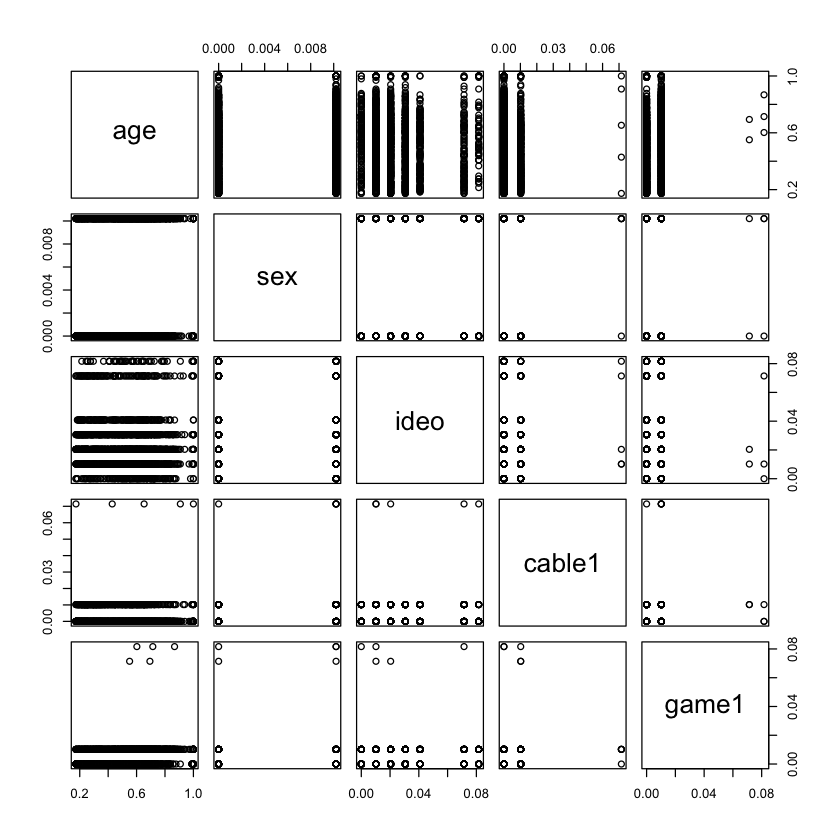

In [150]:
plot(data1)

Produce the 'centers' for the kmeans. Any value of k can be taken. It will produce centers on random.

Below steps are the same as above. Just to compare results with different values of centers.

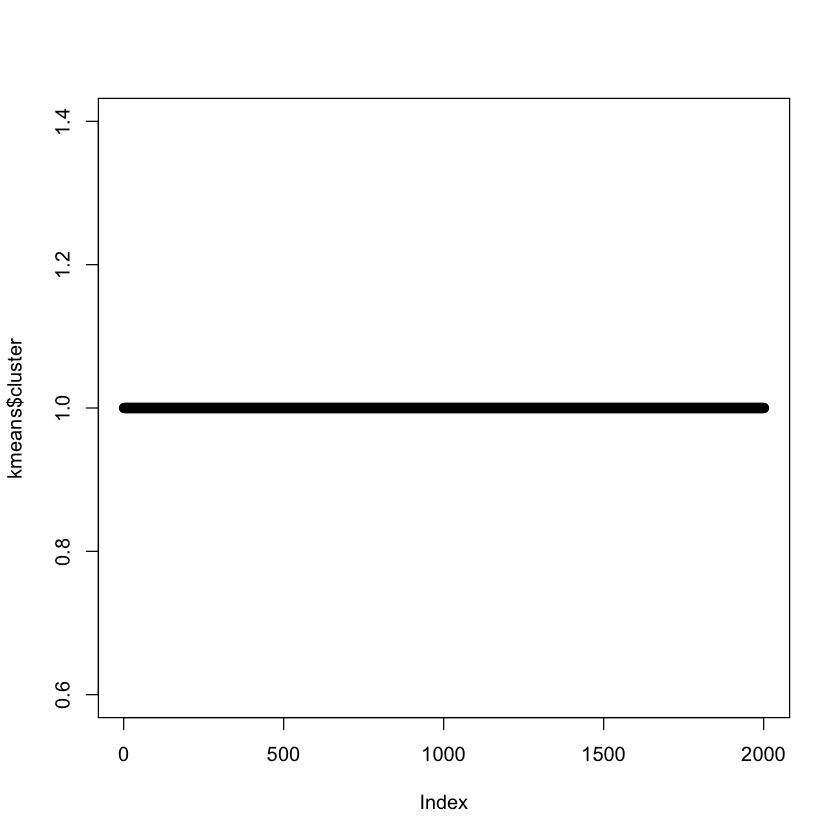

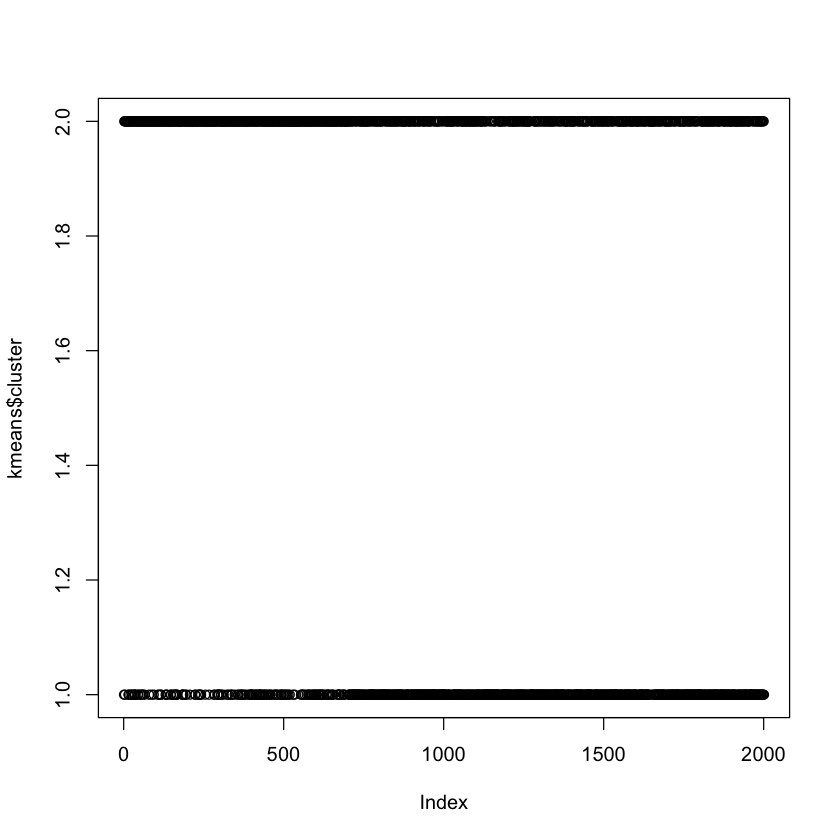

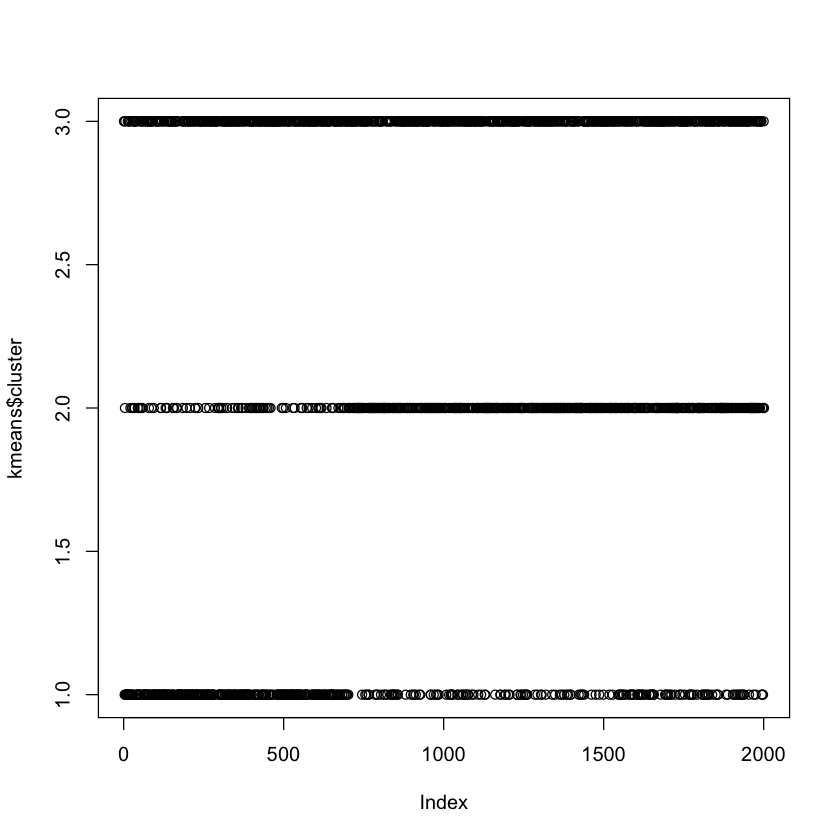

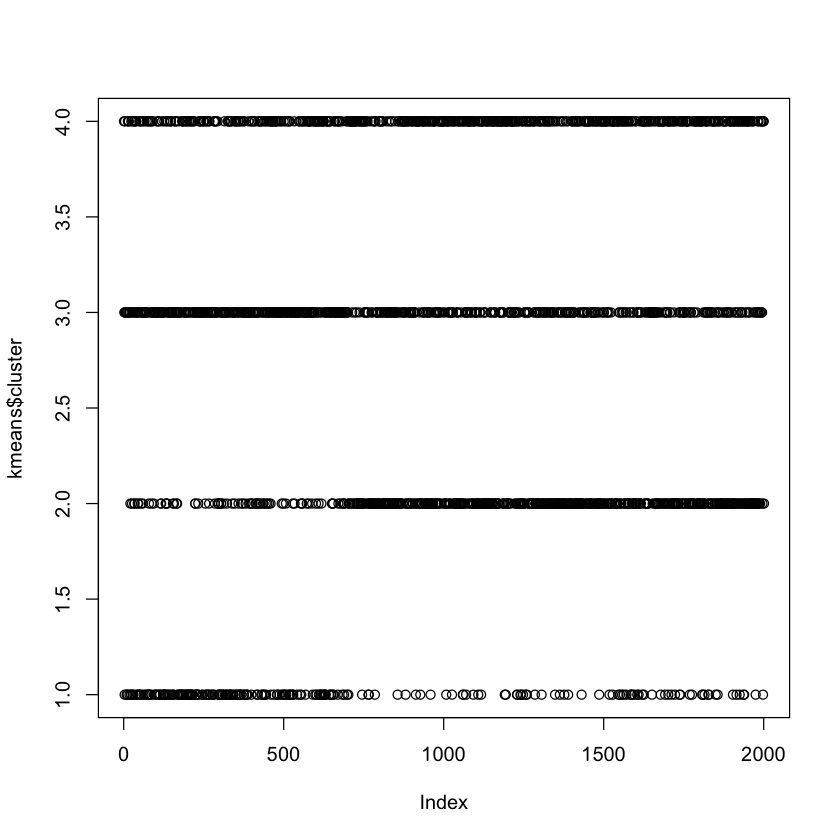

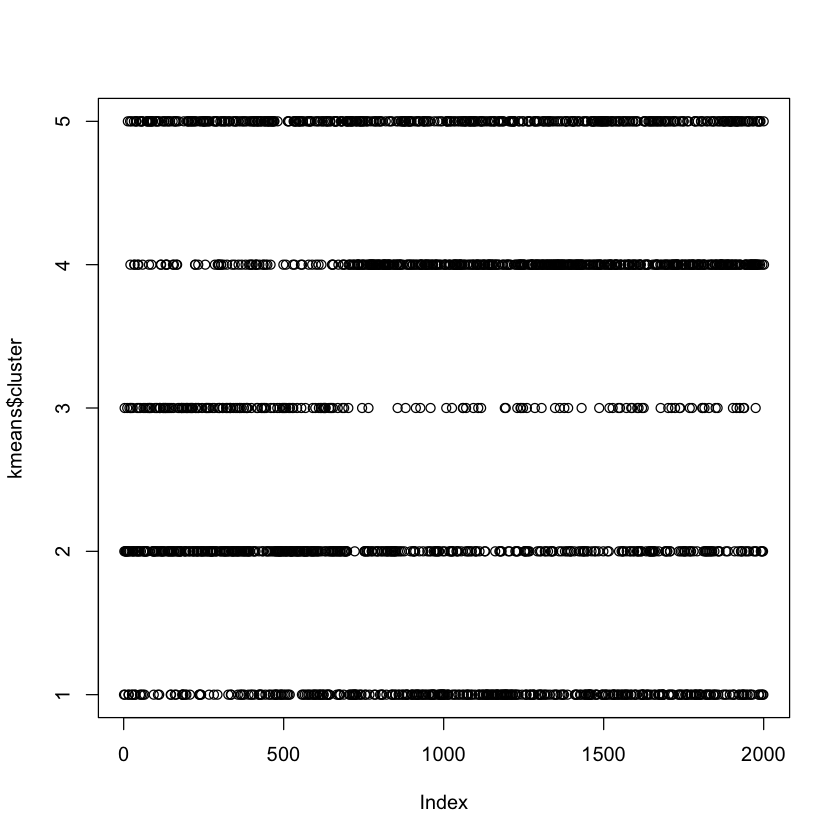

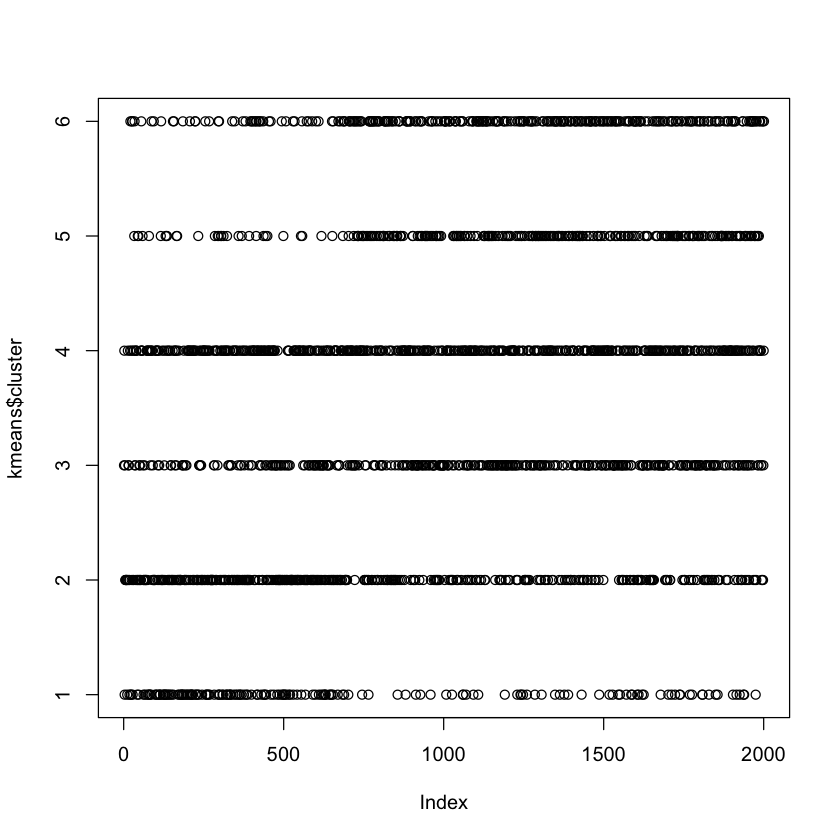

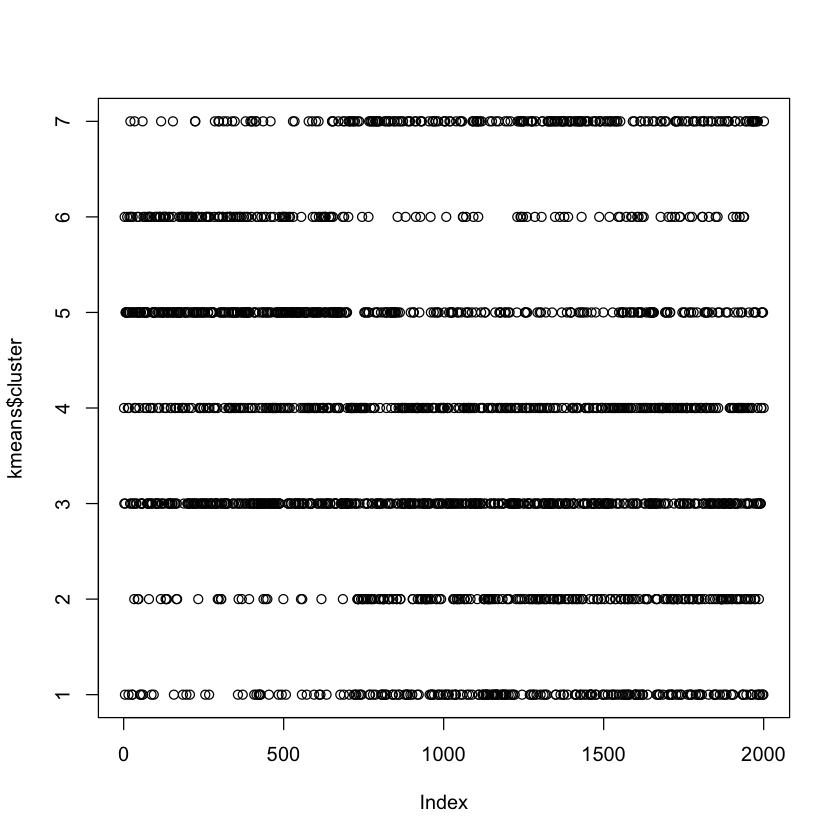

In [151]:
k=7
avg_with=integer(length(k))
for(j in 1:k){
iter=10
with=integer(iter)
random=sample(1:nrow(data1),1)
centers=data1[random,]
if(j>1){
    for (i in 2:j){
    random=sample(1:nrow(data1),1)
    centers=rbind(centers,data1[random,])
    }
}
for(i in 1:iter){
kmeans=kmeans(data1,centers,iter.max = 20, nstart = 1,algorithm='Hartigan-Wong')
with[i] <-kmeans$tot.withinss
    }
avg_with[j]=mean(with)
kmeans
kmeans$centers
plot(kmeans$cluster)
}

K-means clustering with 7 clusters of sizes 226, 223, 454, 364, 355, 159, 220

Cluster means:
        age         sex       ideo      cable1       game1
1 0.3802601 0.004831136 0.02537475 0.003205707 0.004244176
2 0.2109911 0.004301272 0.02631097 0.003569141 0.003203075
3 0.6018610 0.005214421 0.02335251 0.002045312 0.006405646
4 0.4911695 0.005270240 0.02408051 0.001710025 0.005214174
5 0.7141995 0.005777522 0.02207531 0.001063524 0.007559644
6 0.8873700 0.006032602 0.02509306 0.002182005 0.008342960
7 0.2903989 0.004452690 0.02694805 0.003756957 0.003756957

Clustering vector:
   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
   4    3    6    1    3    5    5    5    5    5    6    5    4    5    1    4 
  17   18   19   20   21   22   23   24   25   26   27   28   29   30   31   32 
   5    6    5    3    7    6    6    3    5    1    1    6    5    3    5    3 
  33   34   35   36   37   38   39   40   41   42   43   44   45   46   47   48 
   2    7

,age,sex,ideo,cable1,game1
1,0.3802601,0.004831136,0.02537475,0.003205707,0.004244176
2,0.2109911,0.004301272,0.02631097,0.003569141,0.003203075
3,0.6018610,0.005214421,0.02335251,0.002045312,0.006405646
4,0.4911695,0.005270240,0.02408051,0.001710025,0.005214174
5,0.7141995,0.005777522,0.02207531,0.001063524,0.007559644
6,0.8873700,0.006032602,0.02509306,0.002182005,0.008342960
7,0.2903989,0.004452690,0.02694805,0.003756957,0.003756957


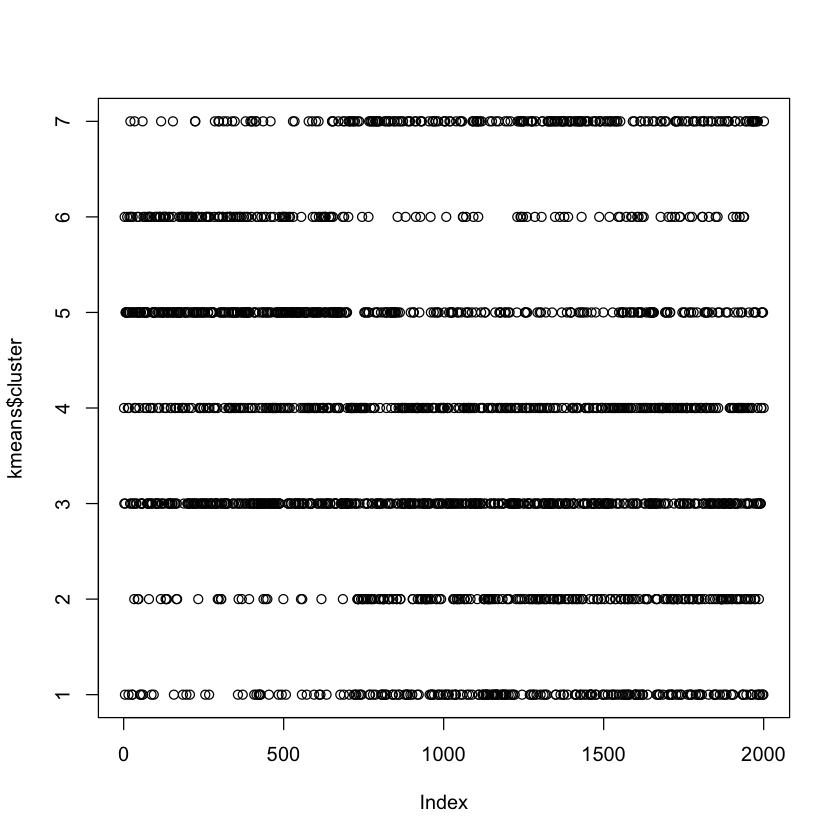

In [152]:
kmeans
kmeans$centers
plot(kmeans$cluster)

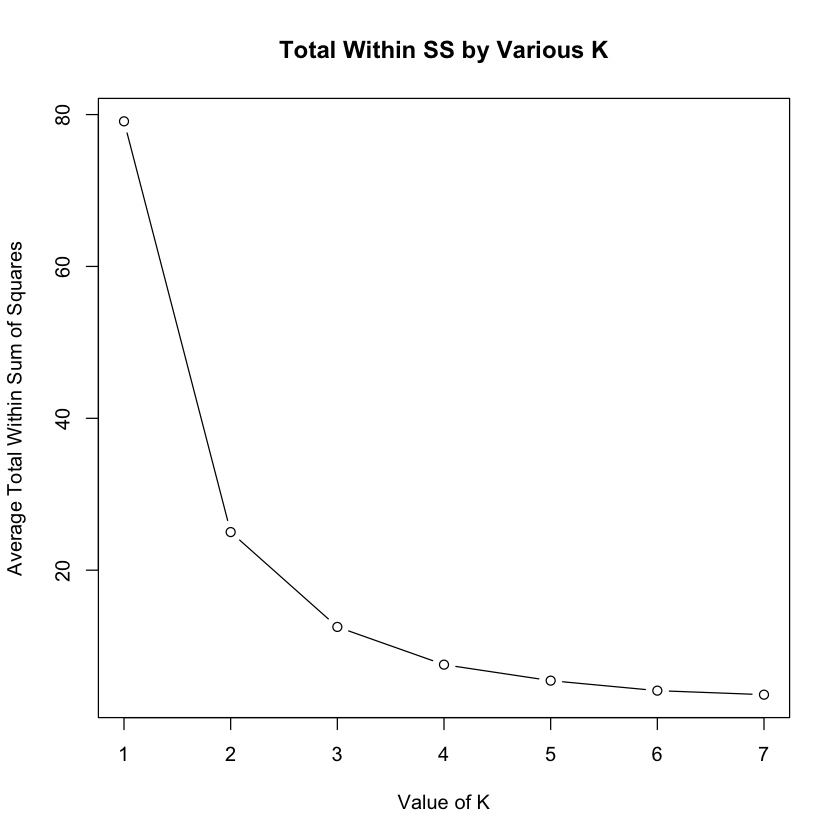

In [153]:
plot(avg_with,type="b", main="Total Within SS by Various K",
 ylab="Average Total Within Sum of Squares",
 xlab="Value of K")

I ran the kmeans many times, each time taking different amount of centers. The between_SS/total_SS is the highest for 7 centers. It may change when the program is run again.
Centers obtained after every iteration is printed. The clusters are also plotted. Each iteration of kmeans happens for max 20 times. 

For each different value of k, iter is also set which is the number of times kmeans is performed. The withiness value is noted for each iteration and an average of that is printed.

Setting different values of k, the loop can be run as many times. Average total within sum of squares is plotted against value of k in the end.

REFERENCES:
1) lab3.pdf
2) https://piazza.com/class/iyg1btjjihw1a6?cid=308
3) http://www.cse.buffalo.edu/~bina/cse487/spring2017/Lectures/classnotes.html
4) http://www.pewinternet.org/datasets/
5) Doing data Science Text book. OReilly.
6) UCI example.